In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

# 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

In [3]:
# print(df.shape)
df.head(100)
# df.describe(include="object")
# df["판매유형별"].value_counts()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
95,미국,사무·문구,면세점 이외,2018.4/4,83
96,미국,사무·문구,면세점 이외,2019.1/4,198
97,미국,사무·문구,면세점 이외,2019.2/4,72
98,미국,사무·문구,면세점 이외,2019.3/4,83


In [4]:
df["데이터"]

0       1054
1        946
2        791
3        854
4       2033
        ... 
2767    1278
2768    1154
2769    1076
2770    2325
2771     725
Name: 데이터, Length: 2772, dtype: int64

In [5]:
df["시점"]

0          2017.1/4
1          2017.2/4
2          2017.3/4
3          2017.4/4
4          2018.1/4
           ...     
2767       2021.2/4
2768       2021.3/4
2769       2021.4/4
2770       2022.1/4
2771    2022.2/4 p)
Name: 시점, Length: 2772, dtype: object

In [9]:
"2022.2/4 p)".split(".")[0]

'2022'

In [11]:
"2022.2/4 p)".split(".")[1].split("/")[0]

'2'

In [7]:
df.rename(columns={"데이터": "백만"}, inplace=True)

In [8]:
# df["시점"].split(".")[0]
df["연도"] = df["시점"].str.split(".").str[0].astype(int)
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022


In [9]:
df["분기"] = df["시점"].str.split(".").str[1].str.split("/").str[0].astype(int)
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [44]:
# 표준편차가 평균 값에 비해 큰 수치로 나타나고 있어 매출 값이 크게 변동하고 있는 것 같습니다.
df[["백만", "연도", "분기"]].describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


# pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요. 

In [3]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [4]:
df.rename(columns={"데이터": "백만"}, inplace=True)
df["연도"] = df["시점"].str.split(".").str[0].astype(int)
df["분기"] = df["시점"].str.split(".").str[1].str.split("/").str[0].astype(int)

In [3]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [5]:
df_pivot = pd.pivot_table(df, values="백만", index="국가(대륙)별", columns="연도", aggfunc="sum")
df_pivot

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


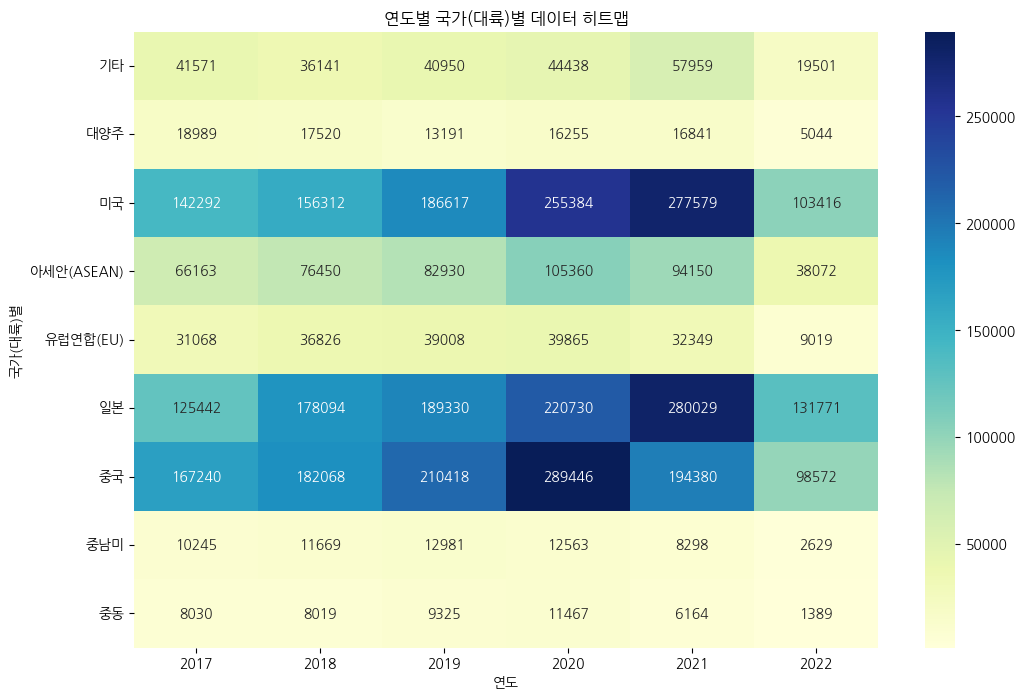

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("연도별 국가(대륙)별 데이터 히트맵")
plt.xlabel("연도")
plt.ylabel("국가(대륙)별")
plt.show()

<Figure size 1200x800 with 0 Axes>

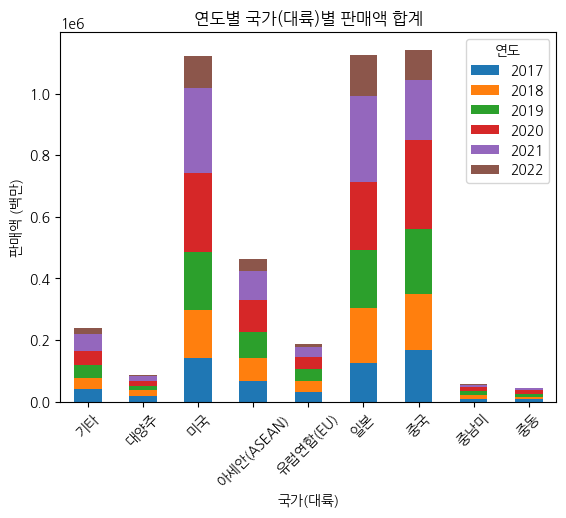

In [7]:
plt.figure(figsize=(12, 8))
df_pivot.plot(kind="bar", stacked=True)
plt.title("연도별 국가(대륙)별 판매액 합계")
plt.xlabel("국가(대륙)")
plt.ylabel("판매액 (백만)")
plt.xticks(rotation=45)
plt.legend(title="연도")
plt.show()

# groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

In [2]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [3]:
df.rename(columns={"데이터": "백만"}, inplace=True)
df["연도"] = df["시점"].str.split(".").str[0].astype(int)
df["분기"] = df["시점"].str.split(".").str[1].str.split("/").str[0].astype(int)

In [4]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [7]:
df_2020 = df[df["연도"] == 2020]
df_2020

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1
...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3


In [8]:
df_groupby = df_2020.groupby(["국가(대륙)별", "상품군별"])["백만"].sum()
df_groupby

국가(대륙)별  상품군별        
기타       가전·전자·통신기기      1716
         기 타             3345
         농축수산물              9
         사무·문구            187
         생활용품 및 자동차용품    1464
                         ... 
중동       음·식료품            927
         음반·비디오·악기       3250
         의류 및 패션 관련상품    1776
         컴퓨터 및 주변기기       388
         화장품             2217
Name: 백만, Length: 126, dtype: int64

In [9]:
df_unstack = df_groupby.unstack()
df_unstack

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


<Figure size 1400x800 with 0 Axes>

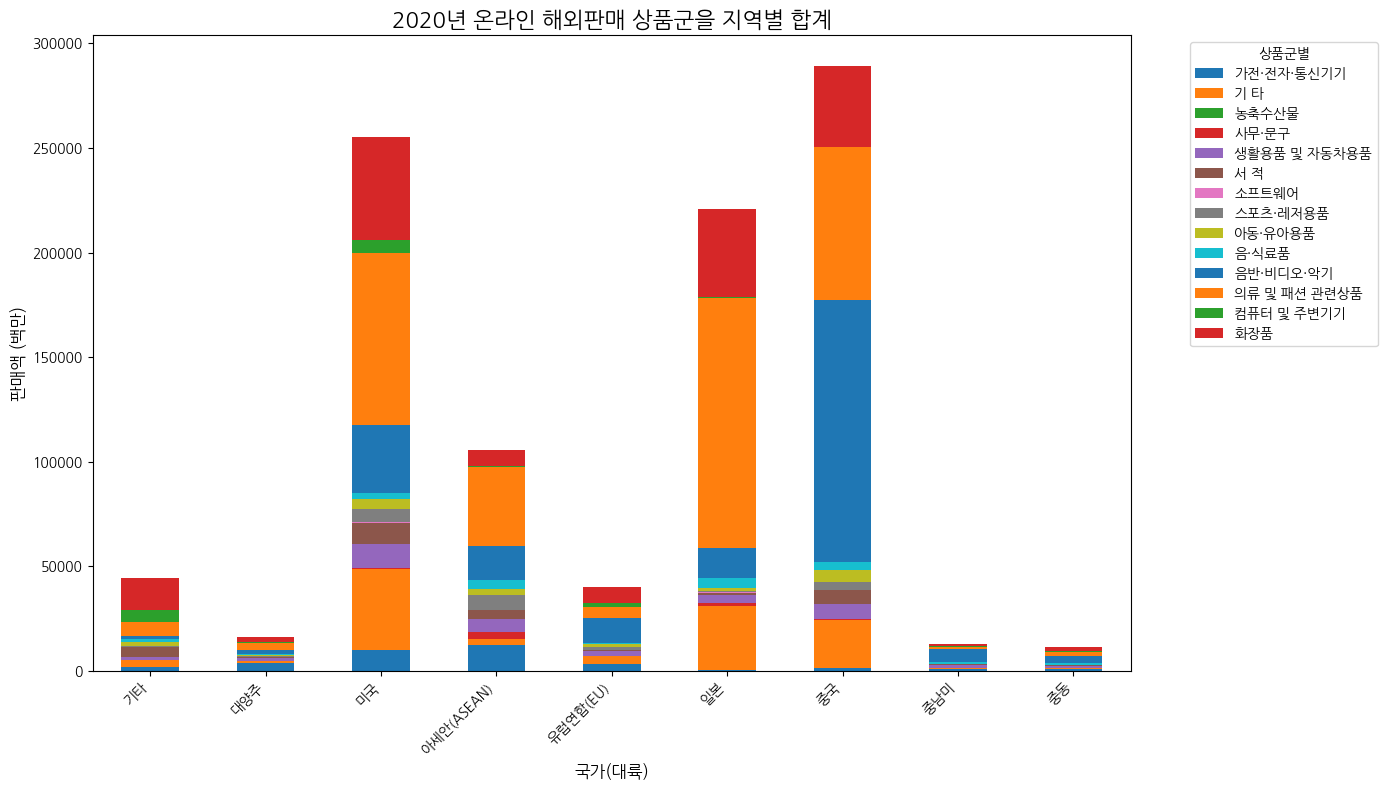

In [11]:
# 중국과 미국이 전체 판매액이 높으며, 특히 중국은 음반, 비디오, 악기에 대한 판매량이 높은 것 같습니다.

plt.figure(figsize=(14, 8))
df_unstack.plot(kind="bar", stacked=True, figsize=(14, 8))
plt.title("2020년 온라인 해외판매 상품군을 지역별 합계", fontsize=16)
plt.xlabel("국가(대륙)", fontsize=12)
plt.ylabel("판매액 (백만)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="상품군별", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

In [2]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [3]:
df.rename(columns={"데이터": "백만"}, inplace=True)
df["연도"] = df["시점"].str.split(".").str[0].astype(int)
df["분기"] = df["시점"].str.split(".").str[1].str.split("/").str[0].astype(int)

In [4]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [6]:
df_sort = df[
    (df["연도"] <= 2021) & 
    (df["국가(대륙)별"].isin(["미국", "중국", "일본"])) & 
    (df["상품군별"].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]))
]
df_sort

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3


In [8]:
df_pivot = df_sort.pivot_table(
    values="백만", 
    index="연도", 
    columns=["국가(대륙)별", "상품군별"], 
    aggfunc='sum', 
    fill_value=0
)

df_pivot

국가(대륙)별        미국                            일본                            중국  \
상품군별    음반·비디오·악기 의류 및 패션 관련상품    화장품 음반·비디오·악기 의류 및 패션 관련상품    화장품 음반·비디오·악기   
연도                                                                              
2017         8628        49891  31237      2824        89085   6333      8437   
2018        13858        47353  38537      7018       134742   5276     15046   
2019        19596        55125  41786      8712       131538  10906     36193   
2020        32919        82154  49446     14738       119452  42215    125078   
2021        41841       100662  38665     15940       118959  77124     62874   

국가(대륙)별                      
상품군별    의류 및 패션 관련상품    화장품  
연도                           
2017           84248  34608  
2018           87611  43873  
2019           77844  59445  
2020           73068  38855  
2021           64078  30472

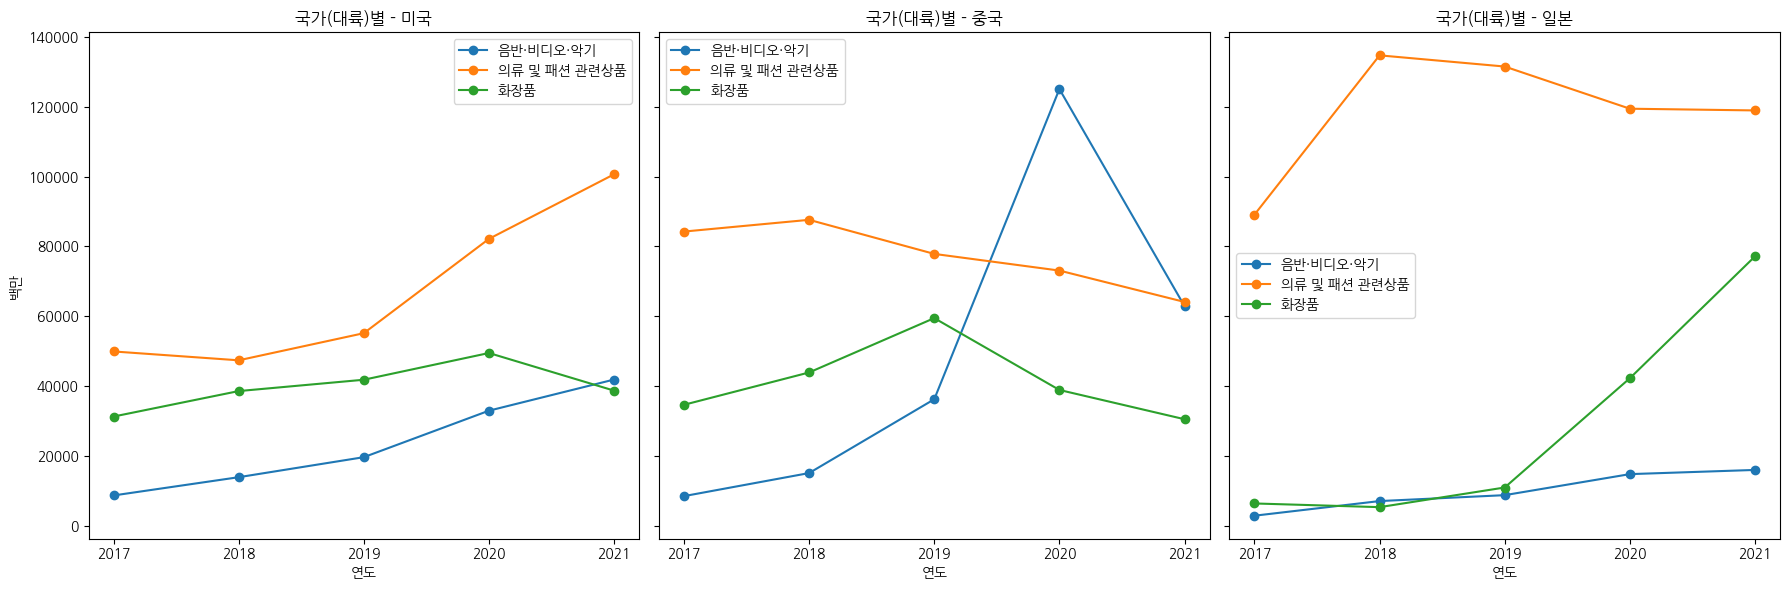

In [13]:
index = [2017, 2018, 2019, 2020, 2021]

def plot_country_sales(ax, country):
    for category in df_pivot[country].columns:
        df_pivot[(country, category)].plot(ax=ax, label=category, marker='o')
    ax.set_title(f'국가(대륙)별 - {country}')
    ax.set_xlabel("연도")
    ax.set_ylabel("백만")
    ax.set_xticks(index)
    ax.legend()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
countries = ["미국", "중국", "일본"]

for ax, country in zip(axes, countries):
    plot_country_sales(ax, country)

plt.tight_layout()
plt.show()

#  KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "./data/SW기술자_평균임금_20240825001401.csv", 
    encoding="utf-8")

In [12]:
df.head()

,시점,IT기획자,IT컨설턴트,정보보호컨설턴트,업무분석가,데이터분석가,IT PM,IT PMO,IT아키텍트,SW 아키텍트,...,IT서비스 기획자,IT기술영업,IT품질관리자,IT테스터,IT감리,IT감사,정보보안전문가,정보보호관리자,침해사고대응전문가,IT교육강사
0,2019,403081,437900,340978,501090,335799,362780,410270,-,389104,...,383295,376746,402554,198611,340109,398085,-,376529,278202,321017
1,2020,388724,458818,342406,532243,347670,411329,326211,-,421761,...,441052,372497,438304,207793,391741,274802,-,391725,327674,257614
2,2021,360307,484732,347123,548550,323184,406823,345428,-,448240,...,347311,341672,424780,200136,424481,236877,-,386114,301482,279165
3,2022,419656,476007,-,544972,347476,463265,-,518084,-,...,-,-,402626,208959,456540,-,362961,-,-,-
4,2023,481654,476404,-,532956,380190,456225,-,534135,-,...,-,-,442826,189146,485624,-,454136,-,-,-


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   시점                  5 non-null      int64 
 1   IT기획자               5 non-null      int64 
 2   IT컨설턴트              5 non-null      int64 
 3   정보보호컨설턴트            5 non-null      object
 4   업무분석가               5 non-null      int64 
 5   데이터분석가              5 non-null      int64 
 6   IT PM               5 non-null      int64 
 7   IT PMO              5 non-null      object
 8   IT아키텍트              5 non-null      object
 9   SW 아키텍트             5 non-null      object
 10  Infrastructure아키텍트  5 non-null      object
 11  데이터 아키텍트            5 non-null      object
 12  UI/UX기획/개발자         5 non-null      object
 13  UI/UX 개발자           5 non-null      object
 14  UI/UX 디자이너          5 non-null      object
 15  응용SW 개발자            5 non-null      int64 
 16  시스템SW 개발자           5 non-null

In [11]:
df[["데이터분석가", "시점"]]

,데이터분석가,시점
0,335799,2019
1,347670,2020
2,323184,2021
3,347476,2022
4,380190,2023


In [17]:
year = 2023
df_year = df[df["시점"] == year].transpose().iloc[1:]
df_year.columns = ["평균 임금"]
df_year["평균 임금"] = pd.to_numeric(df_year["평균 임금"], errors="coerce")
df_year.dropna(inplace=True)
df_year.sort_values("평균 임금", inplace=True)
df_year

,평균 임금
IT테스터,189146.0
IT지원 기술자,215203.0
UI/UX 디자이너,224150.0
시스템SW 개발자,278819.0
UI/UX기획/개발자,315898.0
응용SW 개발자,341404.0
데이터분석가,380190.0
정보시스템운용자,435608.0
IT품질관리자,442826.0
정보보안전문가,454136.0


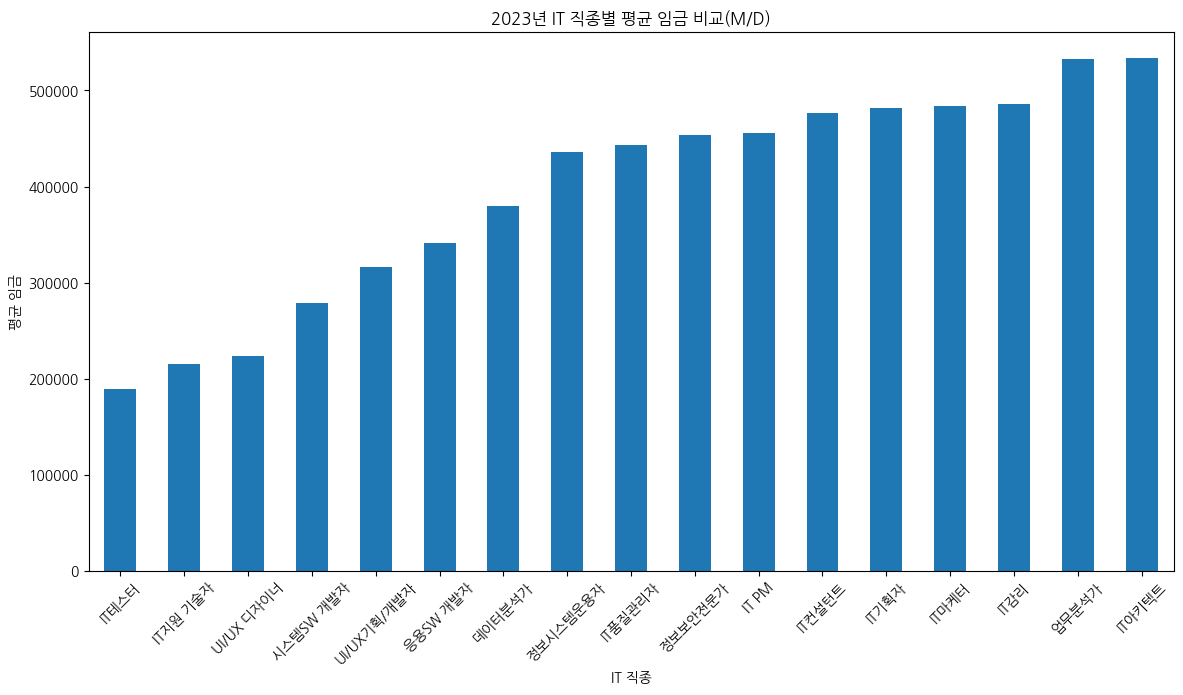

In [18]:
df_year.plot(kind="bar", figsize=(14, 7), legend=None)
plt.title(f"{year}년 IT 직종별 평균 임금 비교(M/D)")
plt.ylabel("평균 임금")
plt.xlabel("IT 직종")
plt.xticks(rotation=45)
plt.show()